# 공개 데이터 다루기

- 공개(public) 데이터를 읽고 특성 파악하기
- 대표적인 공개 데이터셋인 [ChEMBL](https://www.ebi.ac.uk/chembl/), [Pubchem](https://pubchem.ncbi.nlm.nih.gov/), [MoleculeNet](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html) 이용법 소개
- [화학 데이터베이스 목록(위키피디아)](https://en.wikipedia.org/wiki/List_of_chemical_databases)

- **MoleculeNet** (Deepchem 라이브러리로 접근)
<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.22.27.png?raw=1">







- [deepchem](https://deepchem.io/) 라이브러리 사용법 습득
 - 화학, 생물학, 재료공학, 신약 개발자를 위한 파이썬 라이브러리
 - [생명과학을 위한 딥러닝](https://product.kyobobook.co.kr/detail/S000001804947)의 저자인 Bharath Ramsundar가 주도해서 만듬


# import

- deepchem을 설치하면 rdkit이 같이 설치된다

In [1]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import DataStructs

IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina'

# ChEMBL DB

* 신약개발과 관련된 공개 DB
* 무료로 접근가능하고 검색 및 다운로드 지원
* 분자의 2D 구조, 측정된 특징들을 제공한다(logP, MW, Lipinski, etc)

## Chembl 데이터

- 웹 기반으로 데이터를 읽기 위한 패키지 설치

In [3]:
!pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 524.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [4]:
from chembl_webresource_client.new_client import new_client

## Coronavirus 검색

- new_client을 이용해서 특정 키워드를 타겟으로 검색을 할 수 있다
- 'coronavirus' 검색 결과를 데이터프레임으로 가져오기

In [5]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
print(targets.shape)
targets

(10, 9)


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


- 여러 결과중 6 인덱스에 있는 CHEMBL3927에 관한 정보를 얻겠다
- IC50 값을 보겠다

In [6]:
wanted_target = targets.target_chembl_id[6]
wanted_target

'CHEMBL3927'

In [7]:
activity = new_client.activity
resource = activity.filter(target_chembl_id = wanted_target).filter(standard_type="IC50")
data=pd.DataFrame.from_dict(resource)

print(data.shape)
data[:3]

(133, 46)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


## 결측치 처리

In [8]:
data.isnull().sum()

action_type                  133
activity_comment             133
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      133
assay_variant_mutation       133
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        106
data_validity_description    106
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             27
molecule_chembl_id             0
molecule_pref_name           107
parent_molecule_chembl_id      0
pchembl_value                 27
potential_duplicate            0
qudt_units                     0
record_id                      0
relation                       0
src_id                         0
standard_flag                  0
standard_relation              0
standard_t

In [9]:
# 결측치가 많은 "컬럼 삭제"를 수행한다
# 컬럼(열) 삭제를 위해서 axis=1 인자를 지정해야 한다
# 컬럼 삭제가 아닌 일반 "행 삭제"를 하면 133개 샘플이 모두 제거된다

data= data.dropna(axis=1)
data.isnull().sum()

activity_id                  0
activity_properties          0
assay_chembl_id              0
assay_description            0
assay_type                   0
bao_endpoint                 0
bao_format                   0
bao_label                    0
canonical_smiles             0
document_chembl_id           0
document_journal             0
document_year                0
molecule_chembl_id           0
parent_molecule_chembl_id    0
potential_duplicate          0
qudt_units                   0
record_id                    0
relation                     0
src_id                       0
standard_flag                0
standard_relation            0
standard_type                0
standard_units               0
standard_value               0
target_chembl_id             0
target_organism              0
target_pref_name             0
target_tax_id                0
type                         0
uo_units                     0
value                        0
dtype: int64

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=320 align='left'>

In [10]:
# 컬럼 삭제를 한 후 컬럼 수가 줄어든 것 확인
print(data.shape)
data.columns

(133, 31)


Index(['activity_id', 'activity_properties', 'assay_chembl_id',
       'assay_description', 'assay_type', 'bao_endpoint', 'bao_format',
       'bao_label', 'canonical_smiles', 'document_chembl_id',
       'document_journal', 'document_year', 'molecule_chembl_id',
       'parent_molecule_chembl_id', 'potential_duplicate', 'qudt_units',
       'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation',
       'standard_type', 'standard_units', 'standard_value', 'target_chembl_id',
       'target_organism', 'target_pref_name', 'target_tax_id', 'type',
       'uo_units', 'value'],
      dtype='object')

In [11]:
data.standard_value

0       7200.0
1       9400.0
2      13500.0
3      13110.0
4       2000.0
        ...   
128    10600.0
129    10100.0
130    11500.0
131    10700.0
132    78900.0
Name: standard_value, Length: 133, dtype: object

## 목적 변수 범주화

- 목적 변수로 standard_value를 선택하고 세가지 등급으로 나눈다
- 1000 이하(active); 1000~10000(intermediate) ; 10000 이상(inactive)으로 구분
- 세가지 등급을 activity 컬럼에 추가

In [12]:
# 목적 변수 standard_value의 크기에 따라 세가지로 범주화

bioactivity_class = []
for i in data.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

data['activity']=bioactivity_class

- 31개 컬럼중에 일부 컬럼만 사용하겠다

In [13]:
data3 = data[['molecule_chembl_id','canonical_smiles','standard_value', 'activity']]
data3[:5]

,molecule_chembl_id,canonical_smiles,standard_value,activity
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


## mol 객체 보기

In [14]:
list(data3.canonical_smiles[:5])

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]']

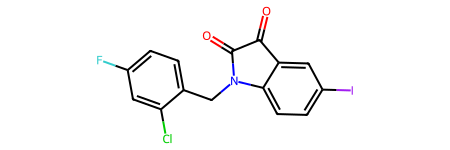

In [16]:
mol_2=Chem.MolFromSmiles(data3.canonical_smiles[1])
mol_2

In [17]:
mol_2.GetNumAtoms(), mol_2.GetNumBonds()

(21, 23)

In [18]:
# mol 블록 파일 내용 보기
print(Chem.MolToMolBlock(mol_2))


     RDKit          2D

 21 23  0  0  0  0  0  0  0  0999 V2000
   -2.6401   -3.1891    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2135   -2.7256    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -3.6073    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -5.1073    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135   -2.7256    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.6401   -3.1891    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9520   -4.6564    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8373   -5.6601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1491   -7.1273    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5757   -7.5908    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8876   -9.0580    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    4.6904   -6.5871    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3786   -5.1199    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4933   -4.1162    0

## Lipinski's Rule

- **Rule of five(RO5)** 라고도 불리며 Druglikeness를 판단하는데 사용
- 1997년 Pfizer의 과학자 Christopher A. Lipinski는 구강복용하는 약물이 상대적으로 크기가 작고 지용성이라는 것을 관찰하여 이 규칙을 고안

- ADME(pharmacokinetic)에 기반한 프로파일
 - Molecular weight < 500 Dalton
 - Octanol-water partition coefficient (LogP) < 5
 - Hydrogen bond donors < 5
 - Hydrogen bond acceptors < 10

- 확보한 데이터에 Descriptor, Lipinski 데이터를 추가하기 위해서 rdkit의 Chem 모듈 사용

In [19]:
from rdkit.Chem import Descriptors, Lipinski

# 특성을 추가하는 함수 정의
# 인자로 SMILES 사용하여 mol 객체를 먼저 얻는다
# mol 객체로 부터 질량, logP 등의 값을 얻는다

def get_descriptor(smile):
  mol=Chem.MolFromSmiles(smile)

  MolWt = Descriptors.MolWt(mol)
  MolLogP = Descriptors.MolLogP(mol)
  NumHDonors = Lipinski.NumHDonors(mol)
  NumHAcceptors = Lipinski.NumHAcceptors(mol)

  return (MolWt, MolLogP, NumHDonors, NumHAcceptors)

In [20]:
# 데이터프레임에 대해서 함수 get_descriptor를 일괄 적용(apply)하여 모든 행에 대해서 4가지 값을 얻는다

result = data3.canonical_smiles.apply(get_descriptor)
result[:5]

0                          (281.271, 1.89262, 0, 5)
1                (415.589, 3.813200000000002, 0, 2)
2    (421.19000000000005, 2.6605000000000008, 0, 4)
3    (293.34700000000004, 3.6308000000000016, 0, 3)
4     (338.3440000000001, 3.5390000000000024, 0, 5)
Name: canonical_smiles, dtype: object

In [21]:
# 위에서 얻은 추가 특성값들로 구성된 데이터프레임 만들기
columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
data_add = pd.DataFrame(list(result), columns=columnNames)
data_add[:5]


,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0,5
1,415.589,3.81320,0,2
2,421.190,2.66050,0,4
3,293.347,3.63080,0,3
4,338.344,3.53900,0,5


In [22]:
# 최초의 데이터프레임과 위에서 만든 추가 데이터프레임 두 개의 데이터프레임 합치기
# 컬럼방향으로 합쳐야 한다
data4 = pd.concat([data3, data_add], axis=1)
data4.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4


## IC50

- inhibitory concentration 50(IC50)은 특정 생물학적 또는 생화학적 기능을 억제하는 물질의 효과를 측정하는데 사용
 - 즉, A가 주는 반응이 100%라고 가정했을때, B가 이를 50% 억제할 수 있는 B의 농도를 **A반응에 대한 B의 IC50**이라고 한다
 - IC50이 1.4μg/ml라면 어떤 반응을 50% 저해시키는데 필요한 농도는 1.4μg/ml임
- IC50의 로그값 $-log_{10} (IC50)$를 **pIC50**으로 표현한다
 - `standard_value`에 $10^{-9}$을 곱하여 nM에서 M 단위로 데이터를 변환

In [23]:
# pIC50을 계산하는 함수

def get_pIC50(input):
  input = np.float(input)
  if input > 100000000.:
        input = 100000000.
  return -np.log10(input*(10**-9)) # nM을 M 단위로 변환

In [24]:
# standard_value 값에 위에서 정의한 함수 get_pIC50()를 적용(apply)

data4['pIC50'] = data4.standard_value.apply(get_pIC50)
data4[:3]

<ipython-input-23-eb2e9c554a9f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  input = np.float(input)


,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4,4.869666


## 데이터 탐색

<Axes: >

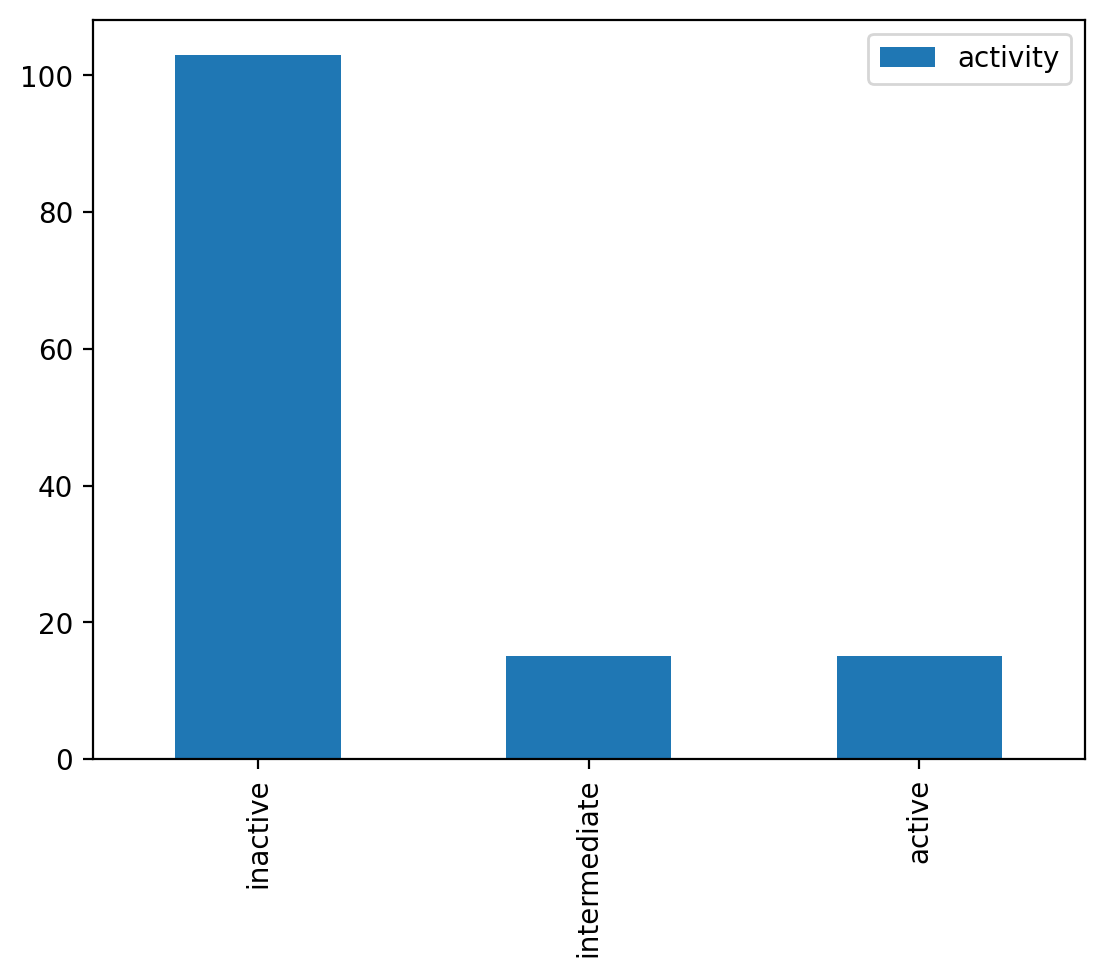

In [25]:
# activity 값의 분포 보기

data4.activity.value_counts().to_frame().plot(kind='bar')

- 박스 플롯
- activity에 대한 여러가지 특성 대한 값들의 분포를 탐색

In [26]:
def draw_boxes(x, y, data):
  plt.figure(figsize=(6, 6))
  sns.boxplot(x = x, y = y, data = data)
  plt.xlabel(x, fontsize=14, fontweight='bold')
  plt.ylabel(y, fontsize=14, fontweight='bold')
  plt.show()

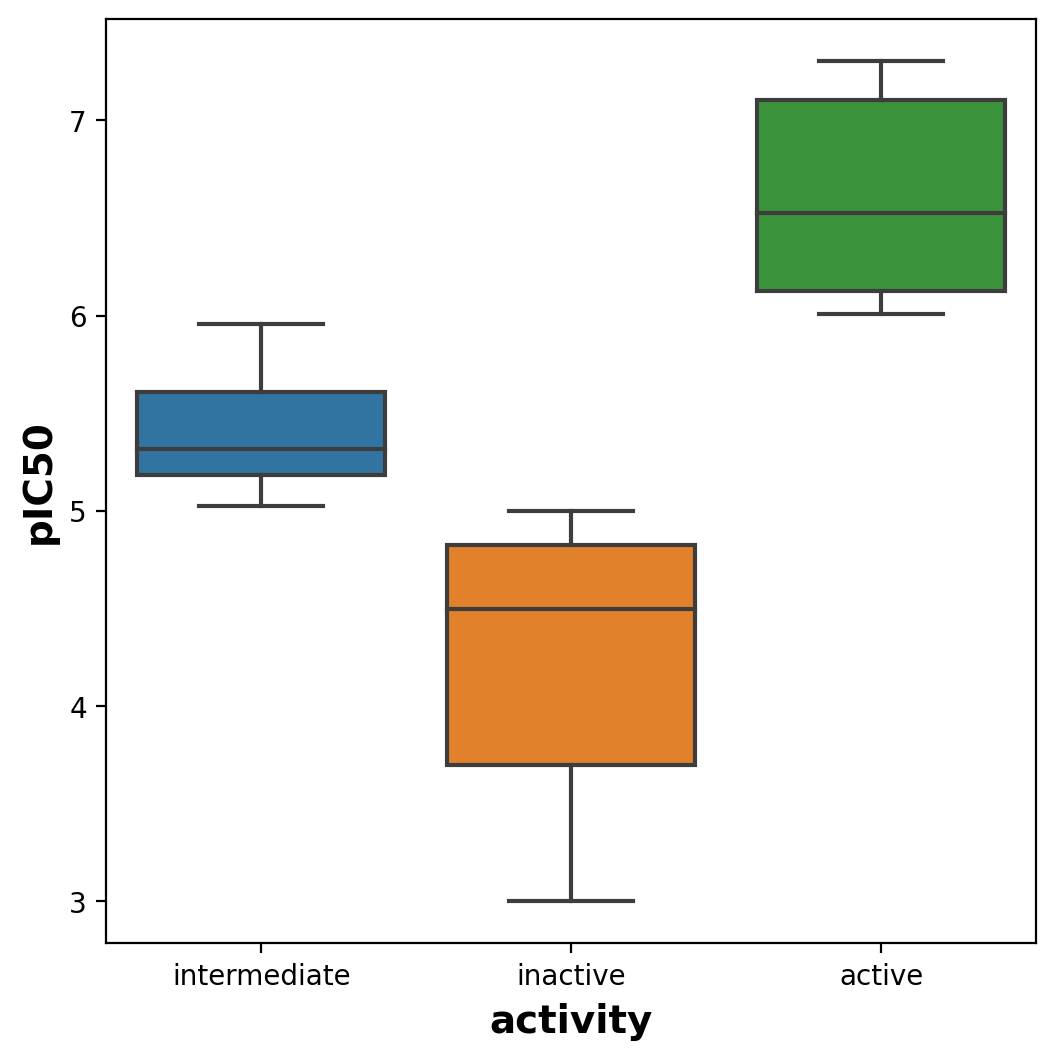

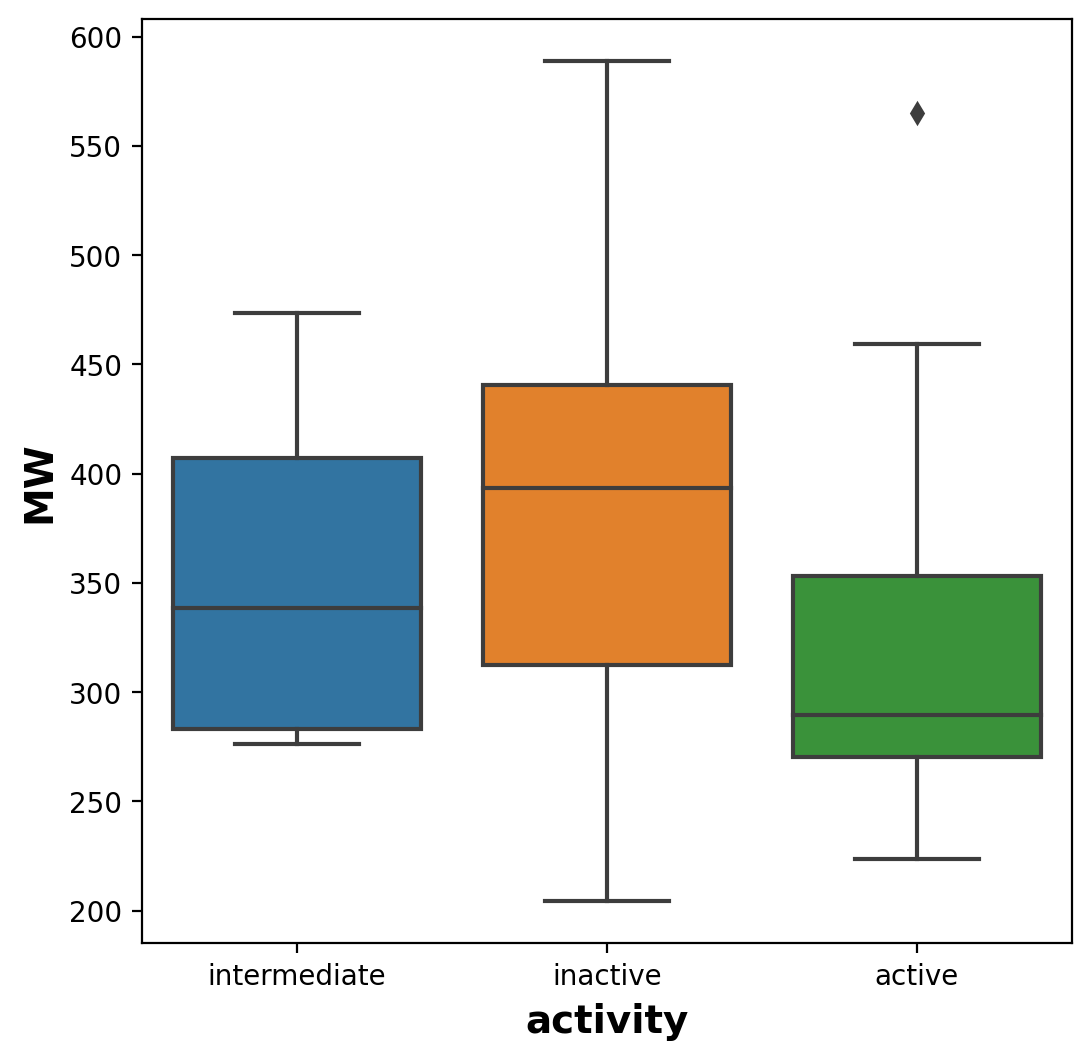

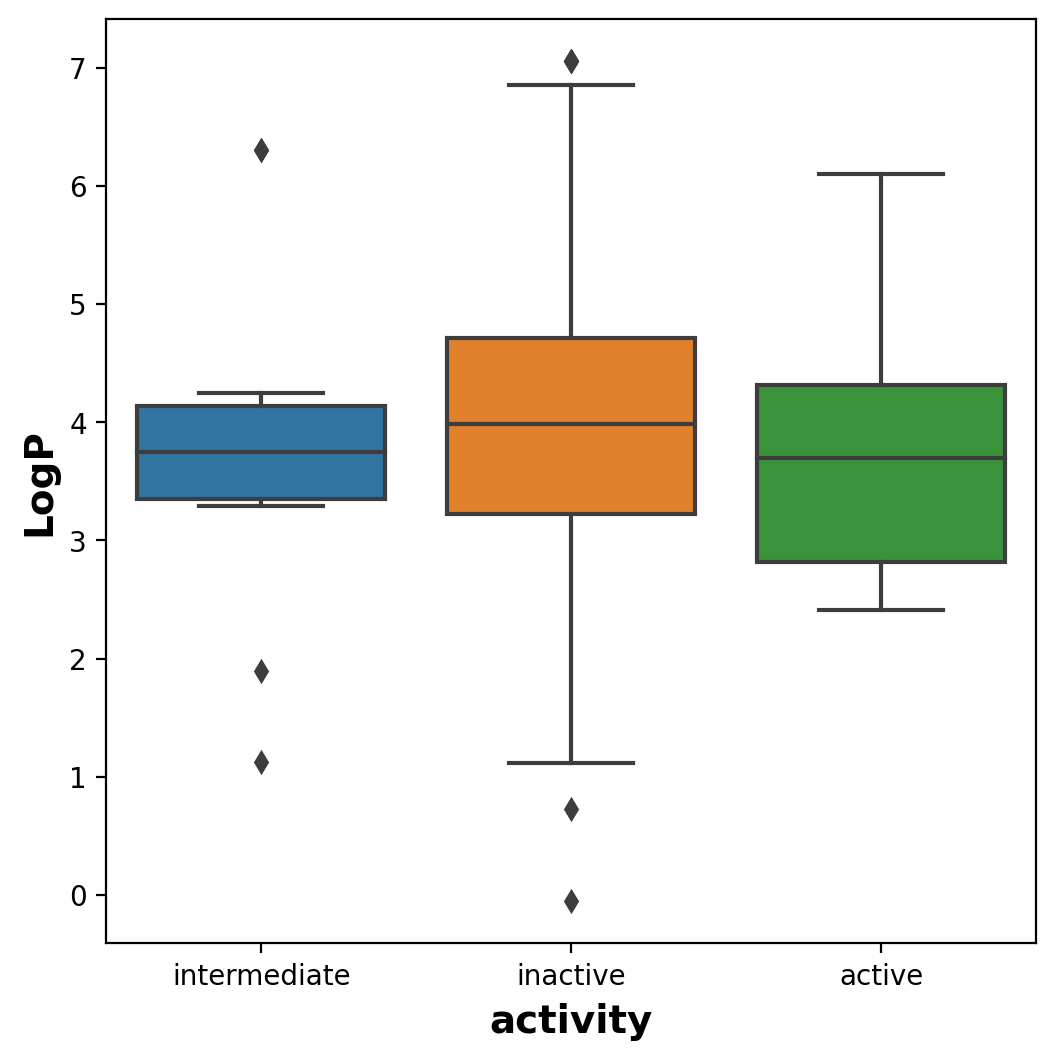

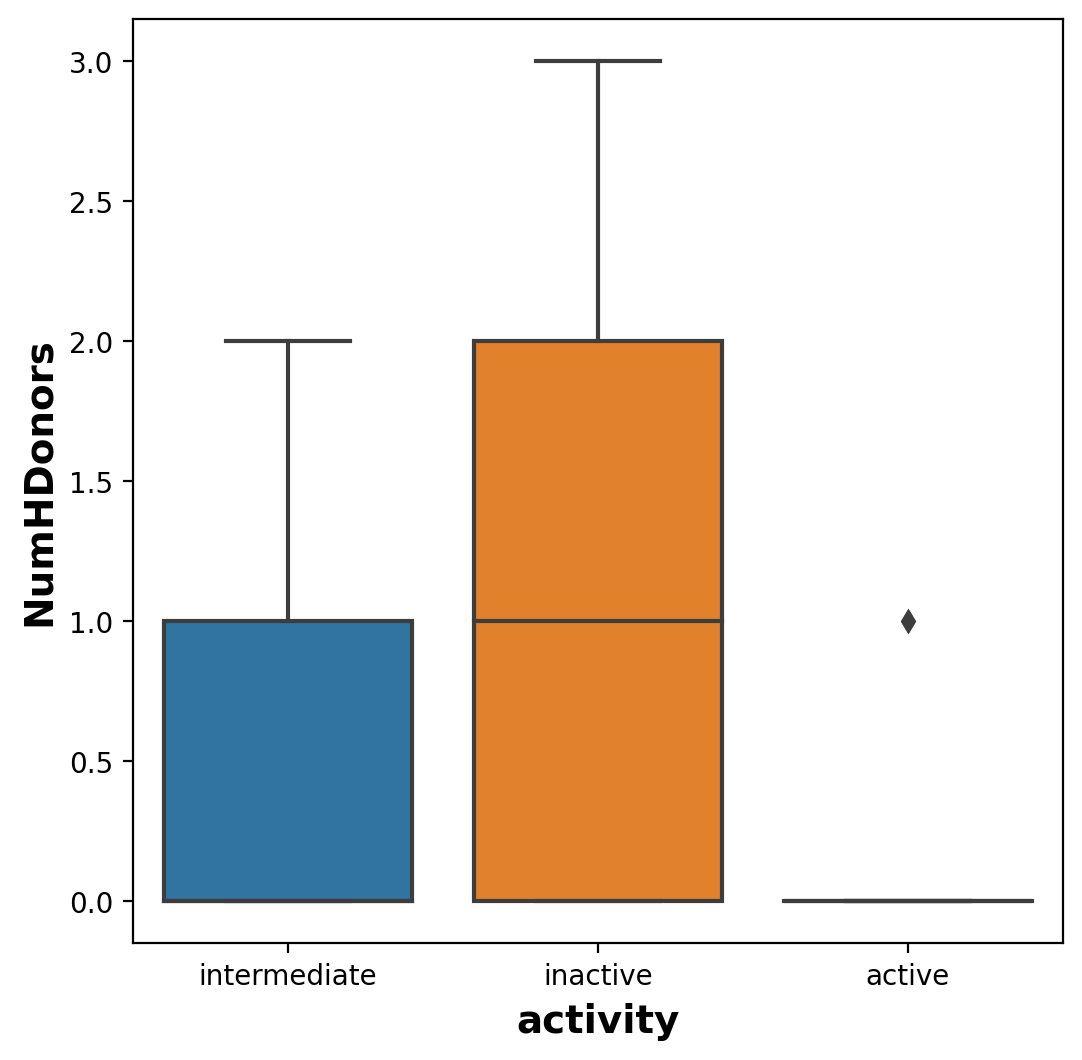

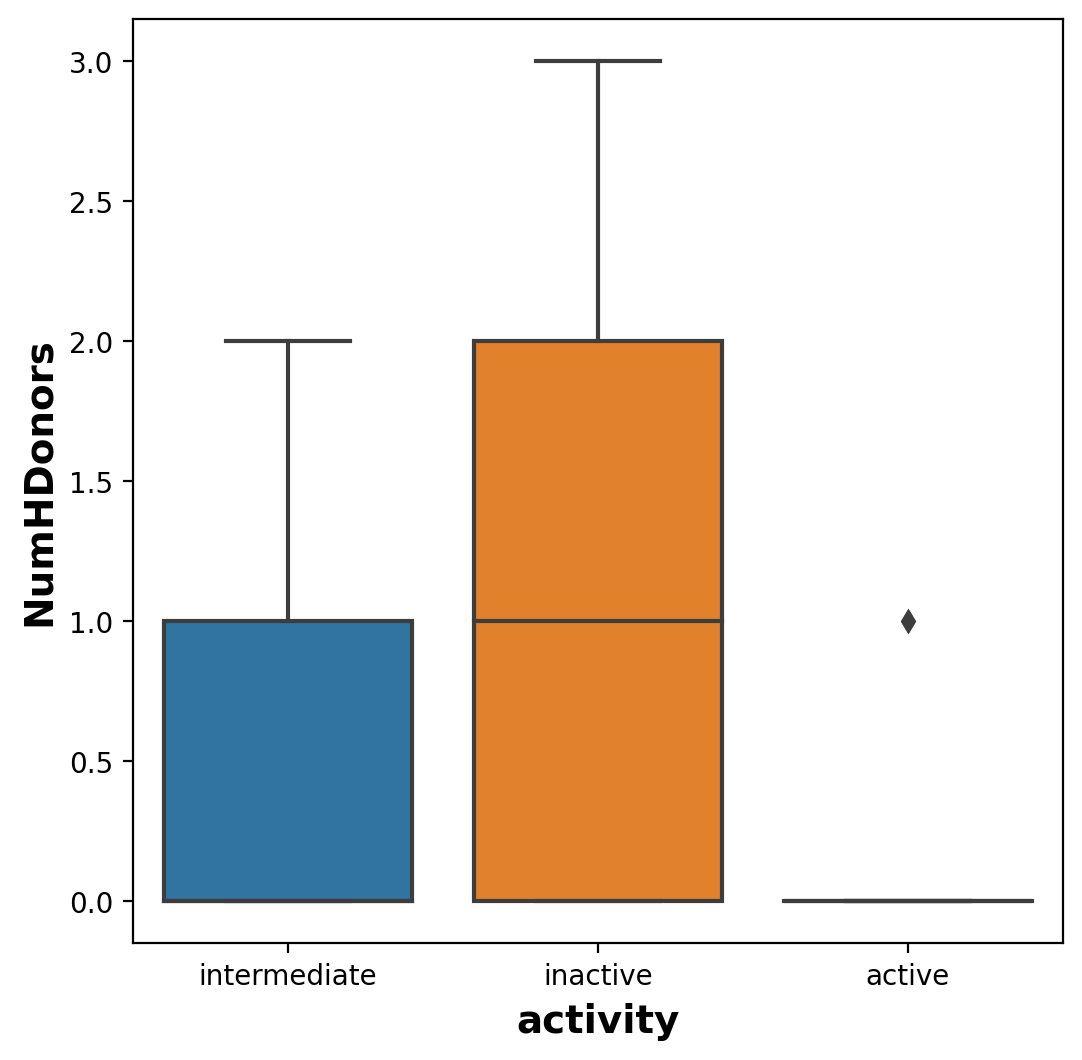

In [27]:
# activity에 대한 여러가지 특성 값 분포 비교

for y in ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHDonors']:
  draw_boxes(x = 'activity', y=y, data = data4)

- 산포도 (스캐터 플롯, scatter plot) 그리기
 - 두 변수의 관계를 파악
 - 점 size 크기를 pIC50에 비례하여 표시

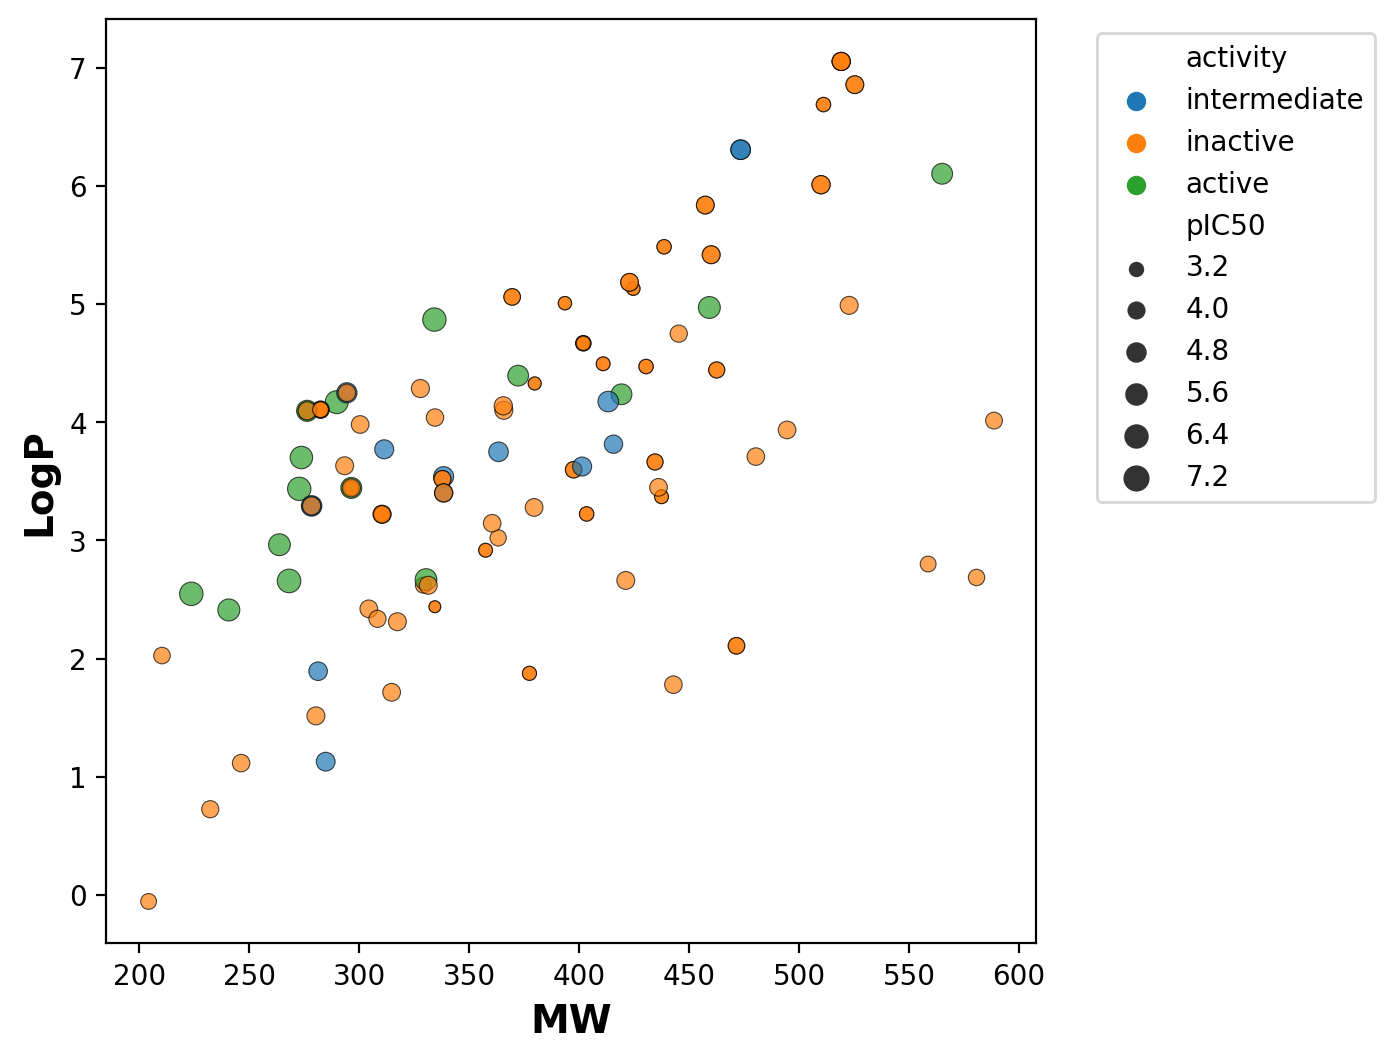

In [28]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=data4,
   hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1))

- Pair Plot
- 여러 변수에 대해서 모든 조합 경우의 산포도를 그림

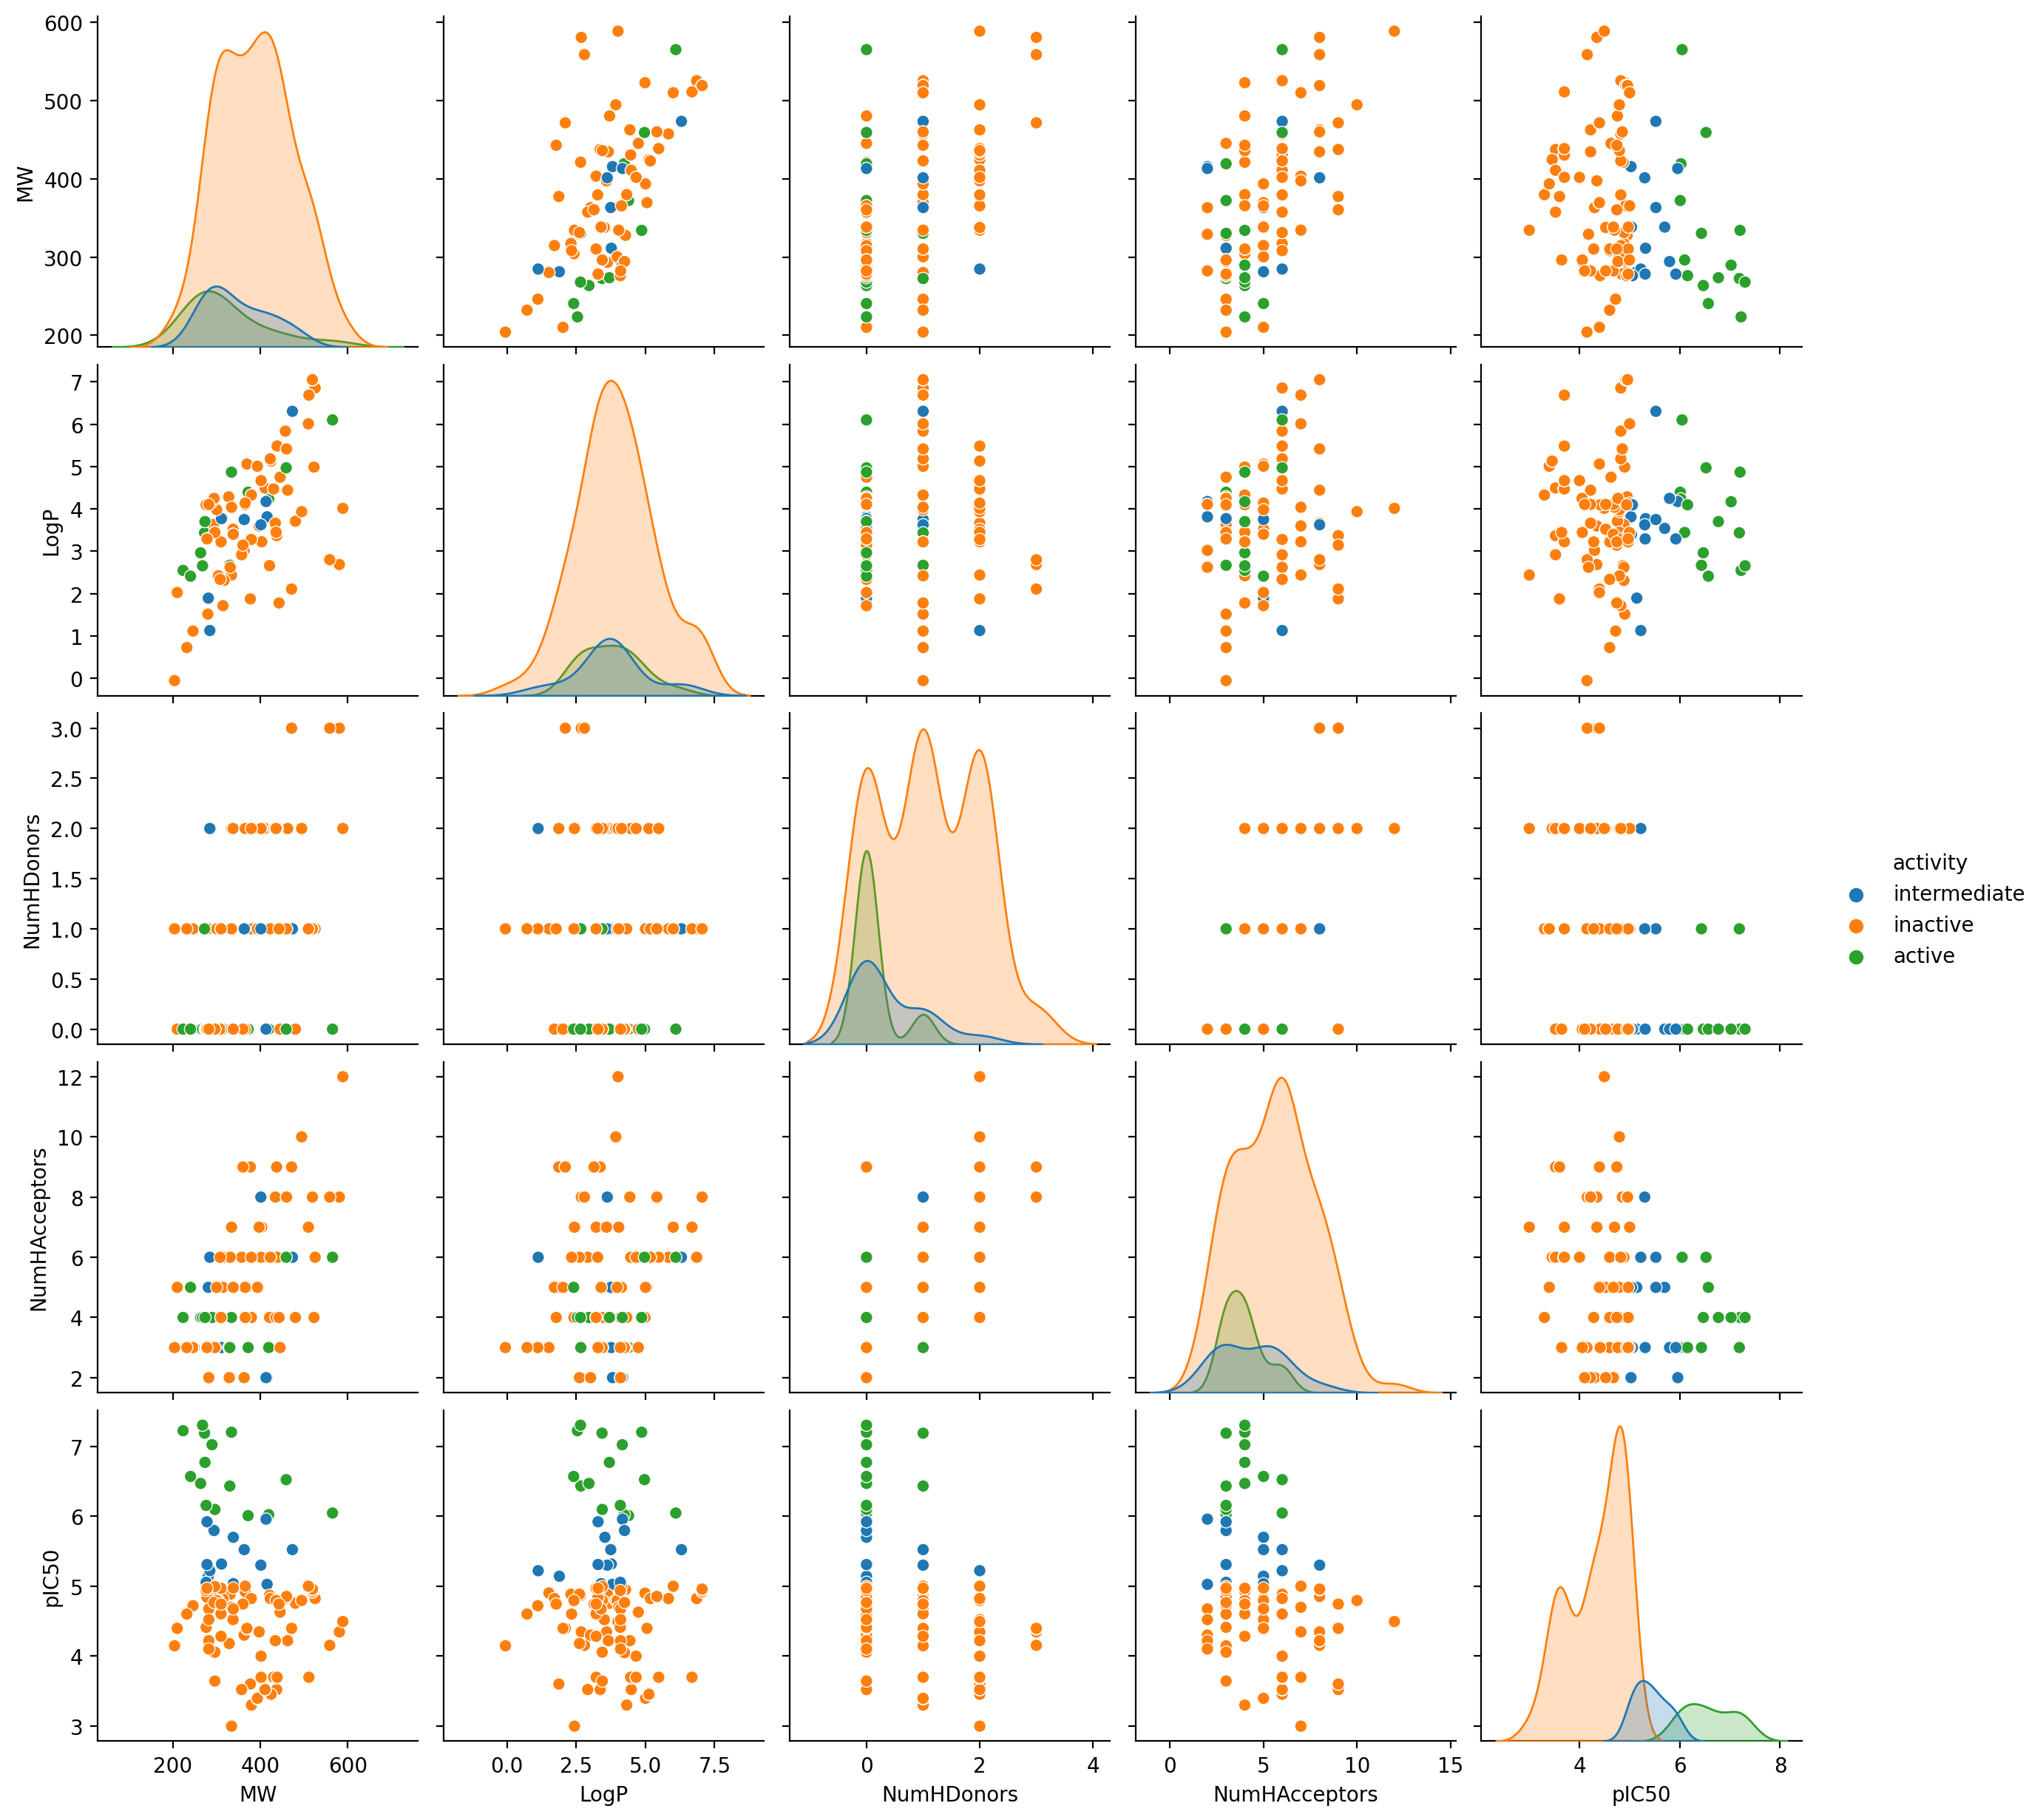

In [29]:
sns.pairplot(data=data4, hue='activity')
plt.show()

## 데이터 저장

- csv 파일로 저장하기
- 디폴트로 인덱스도 같이 저장된다. 인덱스는 저장하지 않으려면 index=False 지정

In [30]:
data4.to_csv("corona_processed.csv", index=False)

In [31]:
!head -5 corona_processed.csv

molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142667503568732
CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.813200000000002,0,2,5.026872146400302
CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.19000000000005,2.6605000000000008,0,4,4.8696662315049934
CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.34700000000004,3.6308000000000016,0,3,4.8823973083099155


# Pubchem 데이터
- Pubchem 데이터 액세스를 위해서 pubchempy 라이브러리 설치

In [32]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=37fefdd48568db2e177772c002e157611bbc9d336b779590b2b2ad56ce886f0c
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [33]:
import pubchempy as pcp

## properties 얻기

- `get_properties` 함수를 사용하여 다양한 속성을 얻을 수 있다
 - 인자로 'canonical_smiles'를 사용한다
 - 함수에 대한 설명은 [여기](https://pubchempy.readthedocs.io/en/latest/guide/properties.html) 참조
- 작업 경과 시간을 표시해주는 tqdm 라이브러리 사용
 - for 문 내에 tqdm()을 추가하면 경과시간을 보여준다

In [39]:
from tqdm import tqdm
all_data = []

for i in tqdm(data4['canonical_smiles']):
    props = pcp.get_properties(['MolecularFormula', 'MolecularWeight',
                                'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge',
                                'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
                                'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount',
                                'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount',
                                'DefinedBondStereoCount', 'UndefinedBondStereoCount', 'CovalentUnitCount',
                                'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D',
                                'ZStericQuadrupole3D', 'FeatureCount3D', 'FeatureAcceptorCount3D',
                                'FeatureDonorCount3D', 'FeatureAnionCount3D', 'FeatureCationCount3D',
                                'FeatureRingCount3D', 'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
                                'EffectiveRotorCount3D', 'ConformerCount3D'], i, 'smiles')
    all_data.append(props)

100%|██████████| 133/133 [03:09<00:00,  1.42s/it]


In [40]:
# 두 번째 분자의 모든 속성 보기
all_data[1]

[{'CID': 44398002,
  'MolecularFormula': 'C15H8ClFINO2',
  'MolecularWeight': '415.58',
  'XLogP': 3.8,
  'ExactMass': '414.92723',
  'MonoisotopicMass': '414.92723',
  'TPSA': 37.4,
  'Complexity': 449,
  'Charge': 0,
  'HBondDonorCount': 0,
  'HBondAcceptorCount': 3,
  'RotatableBondCount': 2,
  'HeavyAtomCount': 21,
  'IsotopeAtomCount': 0,
  'AtomStereoCount': 0,
  'DefinedAtomStereoCount': 0,
  'UndefinedAtomStereoCount': 0,
  'BondStereoCount': 0,
  'DefinedBondStereoCount': 0,
  'UndefinedBondStereoCount': 0,
  'CovalentUnitCount': 1,
  'Volume3D': 240,
  'XStericQuadrupole3D': 8.68,
  'YStericQuadrupole3D': 3.27,
  'ZStericQuadrupole3D': 1.51,
  'FeatureCount3D': 6,
  'FeatureAcceptorCount3D': 2,
  'FeatureDonorCount3D': 0,
  'FeatureAnionCount3D': 0,
  'FeatureCationCount3D': 0,
  'FeatureRingCount3D': 3,
  'FeatureHydrophobeCount3D': 1,
  'ConformerModelRMSD3D': 0.6,
  'EffectiveRotorCount3D': 2.2,
  'ConformerCount3D': 10}]

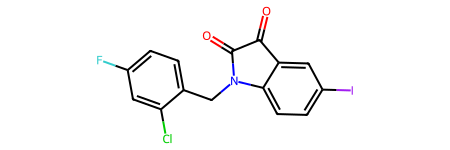

In [41]:
# 두 번째 분자
mol_2

## 추출한 특성을 데이터프레임으로 만들기

In [42]:
rows = []
lenth = data4.shape[0]
columns = all_data[0][0].keys()
for i in range(lenth):
    rows.append(all_data[i][0].values())

props_df = pd.DataFrame(data=rows, columns=columns)
print(props_df.shape)
props_df.head()

(133, 35)


,CID,MolecularFormula,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,44398160,C15H11N3O3,281.27,1.4,281.08004122,281.08004122,87.2,512.0,0.0,0.0,...,7.0,4.0,0.0,0.0,0.0,3.0,0.0,0.6,2.2,10.0
1,44398002,C15H8ClFINO2,415.58,3.8,414.92723,414.92723,37.4,449.0,0.0,0.0,...,6.0,2.0,0.0,0.0,0.0,3.0,1.0,0.6,2.2,10.0
2,44398167,C17H12INO4,421.18,3,420.98111,420.98111,55.8,499.0,0.0,0.0,...,9.0,4.0,0.0,0.0,0.0,4.0,1.0,0.6,3.0,10.0
3,44398055,C17H11NO2S,293.3,3.4,293.05104977,293.05104977,65.6,452.0,0.0,0.0,...,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0
4,44398343,C17H10N2O4S,338.3,3.3,338.03612798,338.03612798,111.0,563.0,0.0,0.0,...,9.0,4.0,0.0,1.0,0.0,4.0,0.0,0.6,3.2,9.0


In [43]:
props_df.columns

Index(['CID', 'MolecularFormula', 'MolecularWeight', 'XLogP', 'ExactMass',
       'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount',
       'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount',
       'IsotopeAtomCount', 'AtomStereoCount', 'DefinedAtomStereoCount',
       'UndefinedAtomStereoCount', 'BondStereoCount', 'DefinedBondStereoCount',
       'UndefinedBondStereoCount', 'CovalentUnitCount', 'Volume3D',
       'XStericQuadrupole3D', 'YStericQuadrupole3D', 'ZStericQuadrupole3D',
       'FeatureCount3D', 'FeatureAcceptorCount3D', 'FeatureDonorCount3D',
       'FeatureAnionCount3D', 'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D'],
      dtype='object')

In [44]:
# 원본 데이터 컬럼
# profs_df에서 필요한 컬럼을 추출하여 data4와 합쳐서 필요한 분석을 한다
data4.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'activity',
       'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

- data4에 있던 기존의 MW 값과 새로 추출한 ExactMass 값 비교하기

In [45]:
data4.MW[:5], props_df.ExactMass.astype(float)[:5]

(0    281.271
 1    415.589
 2    421.190
 3    293.347
 4    338.344
 Name: MW, dtype: float64,
 0    281.080041
 1    414.927230
 2    420.981110
 3    293.051050
 4    338.036128
 Name: ExactMass, dtype: float64)

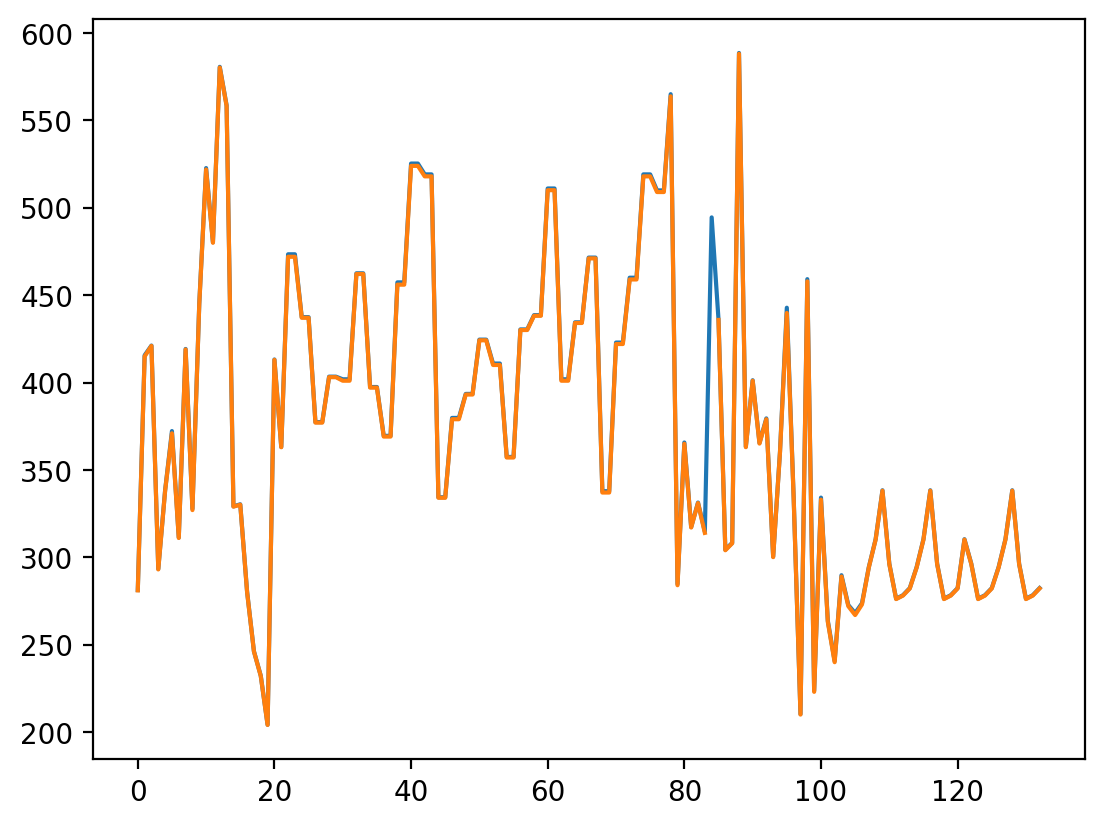

In [46]:
plt.plot(data4.MW)
# plt.show()
plt.plot(props_df.ExactMass.astype(float))

# MoleculeNet 데이터

- deepchem.molnet 클래스가 [MoleculeNet](https://moleculenet.org/datasets-1)의 데이터를 다운로드하는 함수를 제공한다
- 여러 공개 DB를 기반으로 작성되었으며 700,000개 이상의 화합물이 포함되어 있음
- AUC-ROC, AUC-PRC, RMSE, MAE metric을 사용하여 성능 비교 평가를 수행할 수 있음 (벤치마크)

In [47]:
# molnet 클래스의 멤버 함수와 변수 보기
dir(dc.molnet)

['TransformerGenerator',
 '_MolnetLoader',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'dnasim',
 'featurizers',
 'load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15',
 'motif_density',
 'simple_motif_embedding',
 'simulate_motif_counting',
 'simulate_

In [48]:
# "load_" 함수들 보기

all_load = [method for method in dir(dc.molnet) if "load_" in method ]
print(len(all_load))
all_load

42


['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

## Dataset 다운로드

- dc.molnet.load_xxx() 함수 사용
 - (예) load_delaney()를 사용하면 Delaney 용해도 dataset을 다운로드한다 (1128개)
- 다운로드시 원하는 feature를 선택할 수 있다 (featurizer 인자 사용)

- load_xxx() 리턴 값

 - `tasks`: 태스크 이름을 알려준다 (타겟 작업이 무엇인지. 하나 또는 복수)
 - `datasets`: `dc.data.Dataset` 객체로서 `(train, valid, test)` 세 부분으로 구성된다
 - `transformers`: `dc.trans.Transformer` 객체로서 전처리 방법을 알려준다

In [49]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [50]:
print(tasks)
print(test_dataset)

['measured log solubility in mols per litre']
<DiskDataset X.shape: (113, 1024), y.shape: (113, 1), w.shape: (113, 1), ids: ['c1cc2ccc3cccc4ccc(c1)c2c34' 'Cc1cc(=O)[nH]c(=S)[nH]1'
 'Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 ' ...
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'Cc1occc1C(=O)Nc2ccccc2'
 'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '], task_names: ['measured log solubility in mols per litre']>


## load_xxx() 옵션
### featurizer
- 'ECFP', 'GraphConv', 'Weave', 'smiles2img' 등을 선택할 수 있다

### splitter
- 'None', 'index', 'random', 'scaffold', 'stratified' 등을 선택할 수 있다


## Dataset 타입

- `DiskDataset`은 하드디스크에 저장하고 액세스할 데이터셋이다.
- `NumpyDataset` 은 메인 메모리에 저장하고 사용할 데이터로 Numpy arrays 형식으로 저장된다  
- `ImageDataset`은 디스크에 저장되는 이미지 데이터 형식이다

- dataset의 각 행(샘플)은 분자를 구분하며 다음의 값들을 갖는다
 - The *features*, referred to as `X`.  
 - The *labels*, referred to as `y`.  
 - The *weights*, referred to as `w` (이 샘플의 가중치를 표시)  
 - An *ID*, is a unique identifier (여기서는 SMILES를 사용)

## 데이터를 읽는 다른 방법
- `iterbatches(batch_size=100, epochs=10, deterministic=False)`
 - epoch를 지정할 수 있으며, 읽을 때마다 순서를 랜덤하게 바꾼다
- `to_dataframe()`을 사용하면 데이터프레임으로 읽는다
- TensorFlow 타입, 즉 `tensorflow.data.Dataset`을 얻으려면 `make_tf_dataset()`를 사용한다  
- Torch 타입의 `torch.utils.data.IterableDataset`을 얻으려면 `make_pytorch_dataset()`를 사용한다

# Datasets 생성하기

- DeepChem Dataset과 호환성을 갖는 dataset 구조를 직접 만드는 것이 필요한 때가 있다
- 파이썬이 기본으로 제공하는 ndarray 데이터를 Dataset 타입으로 바꾸기 위해서 `NumpyDataset`을 사용한다

In [51]:
import numpy as np

X = np.random.random((10, 5))
y = np.random.random((10, 2))
dataset = dc.data.NumpyDataset(X=X, y=y)
print(dataset)

<NumpyDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- weights 와 IDs는 자동으로 배정되었다.  (w=1)
- 내용 보기

In [52]:
dataset.to_dataframe()

,X1,X2,X3,X4,X5,y1,y2,w,ids
0,0.134930,0.442482,0.637680,0.429638,0.484847,0.895765,0.414020,1.0,0
1,0.537534,0.275922,0.744834,0.005518,0.330892,0.480323,0.832720,1.0,1
2,0.261580,0.680603,0.237925,0.525070,0.097276,0.239649,0.157872,1.0,2
3,0.749980,0.018624,0.194588,0.240810,0.130719,0.857018,0.398128,1.0,3
4,0.820443,0.158906,0.280447,0.758067,0.820737,0.287749,0.696188,1.0,4
5,0.364063,0.876710,0.929320,0.746956,0.991767,0.844167,0.991866,1.0,5
6,0.659380,0.077584,0.198232,0.601231,0.708096,0.512884,0.115371,1.0,6
7,0.041946,0.825129,0.020075,0.566947,0.567536,0.848015,0.833740,1.0,7
8,0.401764,0.387690,0.954140,0.165689,0.404195,0.637846,0.075395,1.0,8
9,0.832830,0.293839,0.657134,0.745106,0.110845,0.354030,0.866306,1.0,9


## (참고) DiskDataset 만들기
- NumPy array에 대해서 `DiskDataset.from_numpy()` 를 사용하여 만들 수 있다

In [53]:
import tempfile

with tempfile.TemporaryDirectory() as data_dir:
    disk_dataset = dc.data.DiskDataset.from_numpy(X=X, y=y, data_dir=data_dir)
    print(disk_dataset)

<DiskDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- 대용량의 데이터를 읽을 때 DeepChem의 `DataLoader` 를 사용하여 편리하게 읽을 수 있다.

